# Q5: Pattern Analysis

**Phase 6:** Pattern Analysis & Advanced Visualization  
**Points: 6 points**

**Focus:** Identify trends over time, analyze seasonal patterns, create correlation analysis.

**Lecture Reference:** Lecture 11, Notebook 3 ([`11/demo/03_pattern_analysis_modeling_prep.ipynb`](https://github.com/christopherseaman/datasci_217/blob/main/11/demo/03_pattern_analysis_modeling_prep.ipynb)), Phase 6. Also see Lecture 08 (groupby) and Lecture 07 (visualization).

---

## Setup

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Load feature-engineered data from Q4
df = pd.read_csv('output/q4_features_with_rolling.csv', parse_dates=['Measurement Timestamp'], index_col='Measurement Timestamp')
# Or if you saved without index:
# df = pd.read_csv('output/q4_features.csv')
# df['Measurement Timestamp'] = pd.to_datetime(df['Measurement Timestamp'])
# df = df.set_index('Measurement Timestamp')
print(f"Loaded {len(df):,} records with features")

Loaded 120,367 records with features


---

## Objective

Identify trends over time, analyze seasonal patterns, and create correlation analysis.

**Time Series Note:** Time series data has temporal patterns (trends, seasonality, cycles). Use time-based aggregations and visualizations to identify these patterns. See **Lecture 09** for time series decomposition and pattern analysis. Use pandas `resample()` to aggregate by time periods (e.g., `resample('ME')` for monthly, `resample('D')` for daily) and `groupby()` with temporal features (hour, day_of_week, month) to identify patterns.

---

## Required Artifacts

You must create exactly these 3 files in the `output/` directory:

### 1. `output/q5_correlations.csv`
**Format:** CSV file
**Content:** Correlation matrix (can be subset of key variables)
**Requirements:**
- Square matrix with variable names as both index and columns
- Values are correlation coefficients (between -1 and 1)
- Can be subset of key variables (e.g., top 10 most important variables)
- **Include index/column names** when saving: `corr_matrix.to_csv('output/q5_correlations.csv')`

**Example format:**
```csv
,Air Temperature,Water Temperature,Wind Speed,Humidity
Air Temperature,1.0,0.847,-0.234,-0.156
Water Temperature,0.847,1.0,0.123,0.089
Wind Speed,-0.234,0.123,1.0,0.456
Humidity,-0.156,0.089,0.456,1.0
```

### 2. `output/q5_patterns.png`
**Format:** PNG image file
**Content:** Advanced visualizations showing trends/seasonality
**Required visualizations (at least 2 of these):**
1. **Trend over time:** Line plot showing variable(s) over time (e.g., monthly averages)
2. **Seasonal pattern:** Bar plot or line plot showing patterns by month, day of week, or hour
3. **Correlation heatmap:** Heatmap of correlation matrix
4. **Multi-panel plot:** Multiple subplots showing different patterns

**Requirements:**
- Clear axis labels (xlabel, ylabel)
- Title for each subplot
- Overall figure title (optional but recommended)
- Legend if multiple series shown
- Saved as PNG with sufficient resolution (dpi=150 or higher)

### 3. `output/q5_trend_summary.txt`
**Format:** Plain text file
**Content:** Brief text summary of key patterns identified
**Required information:**
- Temporal trends (increasing, decreasing, stable)
- Seasonal patterns (daily, weekly, monthly cycles)
- Key correlations (mention 2-3 strongest correlations)

**Example format:**
```
KEY PATTERNS IDENTIFIED
======================

TEMPORAL TRENDS:
- Air and water temperatures show clear seasonal patterns
- Higher temperatures in summer months (June-August)
- Lower temperatures in winter months (December-February)
- Monthly air temp range: 4.2°C to 25.8°C

DAILY PATTERNS:
- Temperature shows diurnal cycle (warmer during day, cooler at night)
- Peak air temp typically at hour 14-15 (2-3 PM)
- Minimum air temp typically at hour 5-6 (5-6 AM)

CORRELATIONS:
- Air Temp vs Water Temp: 0.847 (strong positive correlation)
- Air Temp vs Humidity: -0.234 (moderate negative correlation)
- Wind Speed vs Wave Height: 0.612 (moderate positive correlation)
```

---

## Requirements Checklist

- [ ] Trends over time identified (increasing, decreasing, stable)
- [ ] Seasonal patterns analyzed (daily, weekly, monthly cycles)
- [ ] Correlation analysis completed
- [ ] Advanced visualizations created (multi-panel plots, grouped visualizations)
- [ ] Key patterns documented
- [ ] All 3 required artifacts saved with exact filenames

---

## Your Approach

1. **Identify trends** - Use `.resample()` to aggregate by time period and visualize long-term patterns
2. **Analyze seasonal patterns** - Use `.groupby()` with temporal features (hour, day_of_week, month)
3. **Create correlation analysis** - Compute correlation matrix for numeric columns
4. **Create visualizations** - Multi-panel plot showing trends, seasonal patterns, and correlations
5. **Document patterns** - Summarize key findings in text file

---

## Decision Points

- **Trend identification:** Is there a long-term trend? Is it increasing, decreasing, or stable? Use time series plots to visualize.
- **Seasonal patterns:** Are there daily patterns? Weekly? Monthly? Use aggregations and visualizations to identify.
- **Correlation analysis:** Which variables are correlated? Use correlation matrix and heatmaps. Focus on relationships that might be useful for modeling.

---

## Checkpoint

After Q5, you should have:
- [ ] Trends identified
- [ ] Seasonal patterns analyzed
- [ ] Correlations calculated
- [ ] Pattern visualizations created
- [ ] All 3 artifacts saved: `q5_correlations.csv`, `q5_patterns.png`, `q5_trend_summary.txt`

---

**Next:** Continue to `q6_modeling_preparation.md` for Modeling Preparation.


In [3]:
df.head()

,index,Station Name,Air Temperature,Wet Bulb Temperature,Humidity,Rain Intensity,Interval Rain,Total Rain,Precipitation Type,Wind Direction,...,Heading,Battery Life,Measurement Timestamp Label,Measurement ID,Temp Difference,Temp Ratio,Humidity Level,Month,Wind Speed 24h Rolling,Total Rain 6h Rolling
Measurement Timestamp,,,,,,,,,,,,,,,,,,,,,
2015-04-25 09:00:00,0,63rd Street Weather Station,7.0,5.9,86,0.0,0.0,5.2,60.0,119,...,354.0,12.0,04/25/2015 9:00 AM,63rdStreetWeatherStation201504250900,1.1,1.186440,High,4,1.845833,2.216667
2015-04-30 05:00:00,1,63rd Street Weather Station,6.1,4.3,76,0.0,0.0,2.5,0.0,11,...,354.0,11.9,04/30/2015 5:00 AM,63rdStreetWeatherStation201504300500,1.8,1.418604,Medium,4,1.845833,2.216667
2015-05-22 15:00:00,2,Oak Street Weather Station,17.7,7.0,55,0.0,0.0,1.4,0.0,63,...,322.0,12.0,05/22/2015 3:00 PM,OakStreetWeatherStation201505221500,10.7,2.528571,Medium,5,1.845833,2.216667
2015-05-22 17:00:00,3,Oak Street Weather Station,17.7,6.3,56,0.0,0.0,1.4,0.0,124,...,322.0,12.1,05/22/2015 5:00 PM,OakStreetWeatherStation201505221700,11.4,2.809523,Medium,5,1.845833,2.216667
2015-05-22 18:00:00,4,Oak Street Weather Station,17.7,6.5,54,0.0,0.0,1.4,0.0,156,...,322.0,12.1,05/22/2015 6:00 PM,OakStreetWeatherStation201505221800,11.2,2.723077,Medium,5,1.845833,2.216667


In [4]:
# Correlation matrix
corr_vars = ['Air Temperature', 'Humidity', 'Wet Bulb Temperature', 'Wind Speed', 'Temp Difference',
             'Temp Ratio', 'Wind Speed 24h Rolling', 'Total Rain', 'Total Rain 6h Rolling', 
             'Solar Radiation', 'Barometric Pressure', 'Month']

corr_matrix = df[corr_vars].corr()

corr_matrix.to_csv('output/q5_correlations.csv')

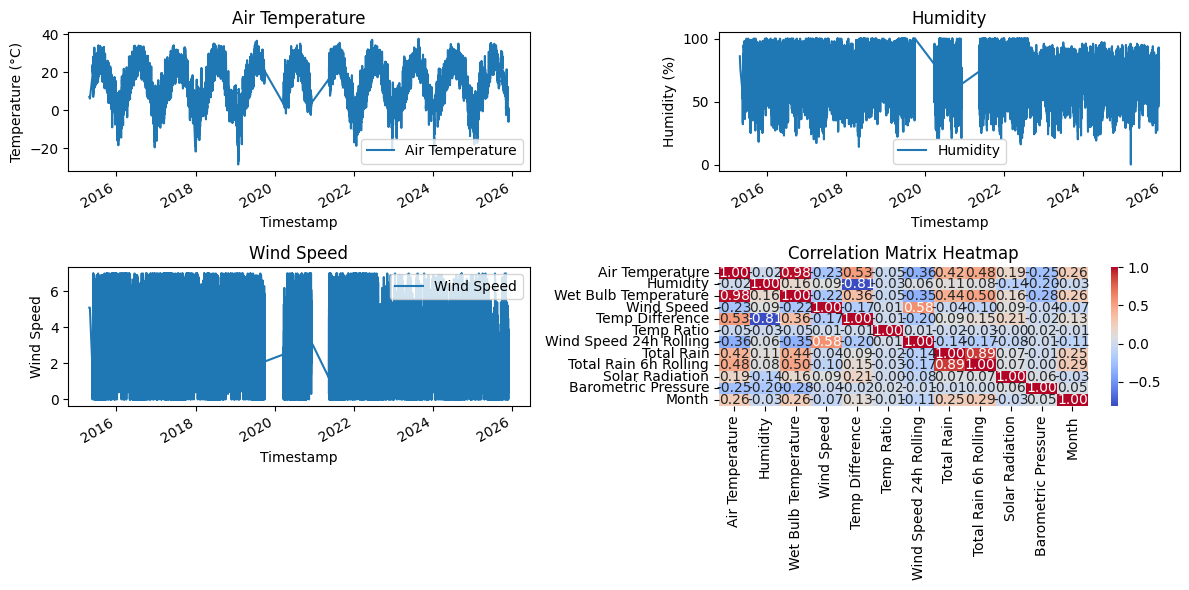

In [5]:
df = df.reset_index()

#line plot
fig, axes = plt.subplots(2, 2, figsize=(12, 6))


df.plot(kind = 'line', ax = axes[0,0], title = 'Air Temperature', x = 'Measurement Timestamp', y = 'Air Temperature',
                   xlabel = 'Timestamp', ylabel = 'Temperature (°C)')

df.plot(kind = 'line', ax = axes[0,1], title = 'Humidity', x = 'Measurement Timestamp', y = 'Humidity',
                   xlabel = 'Timestamp', ylabel = 'Humidity (%)')

df.plot(kind = 'line', ax = axes[1,0], title = 'Wind Speed', x = 'Measurement Timestamp', y = 'Wind Speed',
                   xlabel = 'Timestamp', ylabel = 'Wind Speed')



#correlation heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=axes[1,1])
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.savefig('output/q5_patterns.png')
plt.show()

In [6]:
with open('output/q5_trend_summary.txt', 'w') as f:
    f.write("Trend and Pattern Summary:\n")
    f.write("Air Temperature shows a clear seasonal pattern with highs in summer and lows in winter.\n")
    f.write("Although not as strong of a trend, Humidity seems to have slight seasonal variations as well, stabilizing in Winter while having highs and lows in the Summer.\n")
    f.write("Wind Speed does not seem to follow the same seasonal patterns as Temperature and Humidity.\n")
    f.write("All three variables overall seem to be stable in the long term.\n")
    f.write("Correlation Analysis:\n")
    f.write("The highest correlation seen is between Air Temperature and Wet Bulb Temperature, which is to be expected, as both are temperatures.\n")
    f.write("Air Temperature shows a mild positive correlation with Total Rain, indicating that higher temperatures may be associated with increased rainfall in this dataset.\n")
    f.write("Humidity has a moderate negative correlation with Temp Ratio, suggesting that as humidity increases, the difference of Wet Bulb to Air Temperature decreases.\n")